In [1]:
import numpy as np
import fermion as f
import matplotlib.pyplot as plt
from pandas import DataFrame
from fermion import Math as fm
from timeit import default_timer as timer

import tensorflow as tf

In [2]:
n_spin=2
n = 2*n_spin

In [3]:
3*n**2-5*n

28

In [4]:
dq = f.Operator.double_quantum(n_spin)
Z = f.Operator.global_Z(n_spin)
time_evo = f.Unitary(dq,.05,2.05)
Z1 = time_evo.evolve_op(Z,0.05)

In [5]:
other = (Z1 * Z)

In [6]:
a=[f.Operator.annihilation_op(i,n) for i in range(n_spin)]
adag=[f.Operator.creation_op(i,n) for i in range(n_spin)]

In [7]:
(adag[0]*adag[1]*a[1]*a[0]).trace()

(0.25+0j)

In [8]:
(adag[1]*adag[0]*a[0]*a[1]).trace()

(0.25+0j)

In [9]:
Zt = [time_evo.evolve_op(Z,t) for t in time_evo.t]

In [10]:
comm_ham = [Zt[i].commutator(dq) for i in range(len(Zt))]
sig_ham = [(comm_ham[i].adj()*comm_ham[i]).trace()/Z.n_fermion for i in range(len(Zt))]

C:\Users\awsta\Documents\workspace\tqd-env\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


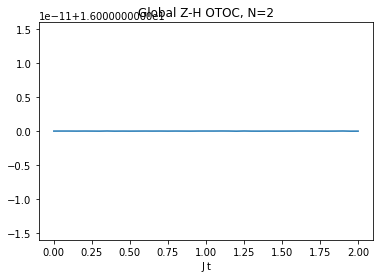

In [11]:
fig, ax = plt.subplots()
ax.set_title('Global Z-H OTOC, N=2')
c=ax.plot(time_evo.t, sig_ham)
ax.set_xlabel('J t')
plt.savefig("zH_otoc.png")
plt.show()

In [12]:
print(Zt[0])

(-2+0j)*c0a0 + (-2+0j)*c1a1 + (2+0j)*I


In [13]:
print(Zt[1])

(-1.1083735778830495e-17-0.19866933079506113j)*a0a1 + (1.1083735778830495e-17+0.19866933079506113j)*a1a0 + (-1.9601331556824835+0j)*c0a0 + (1.1083735778830495e-17-0.19866933079506113j)*c0c1 + (-1.9601331556824835+0j)*c1a1 + (-1.1083735778830495e-17+0.19866933079506113j)*c1c0 + (1.9601331556824835+0j)*I


In [14]:
print(dq)

1.0*a0a1 + -1.0*a1a0 + -1.0*c0c1 + 1.0*c1c0


In [15]:
temp = Zt[0].commutator(dq)

In [16]:
print(temp)

(4+0j)*a0a1 + (-4+0j)*a1a0 + (4+0j)*c0c1 + (-4+0j)*c1c0


In [17]:
print(temp.adj()*temp)

(-16+0j)*a0a1a0a1 + (16+0j)*a0a1a1a0 + (-16+0j)*a0a1c0c1 + (16+0j)*a0a1c1c0 + (16+0j)*a1a0a0a1 + (-16+0j)*a1a0a1a0 + (16+0j)*a1a0c0c1 + (-16+0j)*a1a0c1c0 + (-16+0j)*c0c1a0a1 + (16+0j)*c0c1a1a0 + (-16+0j)*c0c1c0c1 + (16+0j)*c0c1c1c0 + (16+0j)*c1c0a0a1 + (-16+0j)*c1c0a1a0 + (16+0j)*c1c0c0c1 + (-16+0j)*c1c0c1c0


In [18]:
(temp.adj()*temp).trace()/2

(16+0j)

In [19]:
(a[1]*1j).adj()

-1j*c1

In [20]:
(adag[0]*a[0]).adj()

(1-0j)*c0a0

In [21]:
Zt[1].normal_order()

(-1.1083735778830495e-17-0.19866933079506113j)*a0a1 + (1.1083735778830495e-17+0.19866933079506113j)*a1a0 + (-1.9601331556824835+0j)*c0a0 + (1.1083735778830495e-17-0.19866933079506113j)*c0c1 + (-1.9601331556824835+0j)*c1a1 + (-1.1083735778830495e-17+0.19866933079506113j)*c1c0 + (1.9601331556824835+0j)*I

In [22]:
Zt[1].commutator(dq)**2

(-2.5260481919076754+0j)*I + -12.461386953876811j*a0a1 + 12.461386953876811j*a1a0 + (5.052096383815351+0j)*c0a0 + -12.461386953876811j*c0c1 + (5.052096383815351+0j)*c1a1 + 12.461386953876811j*c1c0 + (15.368487952023084+0j)*a0a1a0a1 + (-15.368487952023084+0j)*a0a1a1a0 + 6.230693476938406j*a0a1c0a0 + (15.368487952023084+0j)*a0a1c0c1 + 6.230693476938406j*a0a1c1a1 + (-15.368487952023084+0j)*a0a1c1c0 + (-15.368487952023084+0j)*a1a0a0a1 + (15.368487952023084+0j)*a1a0a1a0 + -6.230693476938406j*a1a0c0a0 + (-15.368487952023084+0j)*a1a0c0c1 + -6.230693476938406j*a1a0c1a1 + (15.368487952023084+0j)*a1a0c1c0 + 6.230693476938406j*c0a0a0a1 + -6.230693476938406j*c0a0a1a0 + (-2.5260481919076754+0j)*c0a0c0a0 + 6.230693476938406j*c0a0c0c1 + (-2.5260481919076754+0j)*c0a0c1a1 + -6.230693476938406j*c0a0c1c0 + (15.368487952023084+0j)*c0c1a0a1 + (-15.368487952023084+0j)*c0c1a1a0 + 6.230693476938406j*c0c1c0a0 + (15.368487952023084+0j)*c0c1c0c1 + 6.230693476938406j*c0c1c1a1 + (-15.368487952023084+0j)*c0c1c1c0 +

In [23]:
temp = Zt[2].commutator(dq,use_speedup=False)

In [24]:
(temp.normal_order()**2).trace()

(-32.00000000000001+0j)

In [25]:
(Zt[2].commutator(dq)**2).trace()

(-32.00000000000001+0j)

In [26]:
temp.normal_order()

-3.1153467384692073j*I + (-7.36848795202308+0j)*a1a0 + 3.1153467384692073j*c0a0 + 3.1153467384692073j*c1a1 + (-7.36848795202308+0j)*c1c0 + 2.220446049250313e-16j*c1c0a1a0

In [34]:
Zt[2].commutator(dq).square_trace()

(-32.00000000000001+0j)